In [59]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 

1. Enregistrer les données dans un format adapté pour une lecture par la suite avec Python sa- chant que la première ligne du fichier correspond au noms des variables. Convertir la colonne date en type datetime et supprimer toutes les lignes ayant une valeur manquante.


In [320]:
data=pd.read_csv('covid-senegal.csv')



In [321]:
data.head()

,date,tests,cas,contact,importe,communautaire
0,02/03/2020,1.0,1,0,0,0
1,03/03/2020,2.0,1,0,1,0
2,04/03/2020,2.0,2,1,1,0
3,05/03/2020,NaN,0,0,0,0
4,06/03/2020,2.0,0,0,0,0


---supression de la ligne vide---

In [322]:
data.dropna(subset=['tests'], inplace=True)

In [323]:
data.head()

,date,tests,cas,contact,importe,communautaire
0,02/03/2020,1.0,1,0,0,0
1,03/03/2020,2.0,1,0,1,0
2,04/03/2020,2.0,2,1,1,0
4,06/03/2020,2.0,0,0,0,0
5,07/03/2020,2.0,0,0,0,0


--conversion de date en datetime--


In [324]:
data['date']=pd.to_datetime(data['date'])

2. Ajouter dans les données une nouvelle variable proportion qui représente le taux depositivité journalier.


In [325]:
data['proportion']=((data['cas']*100)/data['tests'])
data.tail()


,date,tests,cas,contact,importe,communautaire,proportion
491,2021-07-07,2388.0,356,127,0,229,14.907873
492,2021-08-07,2166.0,354,135,1,218,16.343490
493,2021-09-07,2104.0,476,215,0,261,22.623574
494,2021-10-07,2762.0,380,136,0,234,13.758146
495,2021-11-07,2715.0,529,188,0,341,19.484346


In [326]:
data.head(10)

,date,tests,cas,contact,importe,communautaire,proportion
0,2020-02-03,1.0,1,0,0,0,100.000000
1,2020-03-03,2.0,1,0,1,0,50.000000
2,2020-04-03,2.0,2,1,1,0,100.000000
4,2020-06-03,2.0,0,0,0,0,0.000000
5,2020-07-03,2.0,0,0,0,0,0.000000
6,2020-08-03,2.0,0,0,0,0,0.000000
7,2020-09-03,6.0,0,0,0,0,0.000000
8,2020-10-03,1.0,0,0,0,0,0.000000
9,2020-11-03,8.0,1,0,1,0,12.500000
10,2020-12-03,6.0,5,5,0,0,83.333333


3. Ajouter dans les données une nouvelle variable total qui représente le nombre cumulé de cas positifs du début de la pandémie jusqu’à une certaine date.

In [376]:
data['total']=data['cas'].cumsum()
data.tail(10)

,tests,cas,contact,importe,communautaire,proportion,total
date,,,,,,,
2021-02-07,2210.0,164,64,0,100,7.420814,45480
2021-03-07,2082.0,200,68,0,132,9.606148,45680
2021-04-07,2104.0,141,49,0,92,6.701521,45821
2021-05-07,1817.0,191,87,0,104,10.511833,46012
2021-06-07,1255.0,121,45,0,76,9.641434,46133
2021-07-07,2388.0,356,127,0,229,14.907873,46489
2021-08-07,2166.0,354,135,1,218,16.343490,46843
2021-09-07,2104.0,476,215,0,261,22.623574,47319
2021-10-07,2762.0,380,136,0,234,13.758146,47699


In [377]:
data.set_index('date',inplace=True )


KeyError: "None of ['date'] are in the columns"

In [378]:
data.head()

,tests,cas,contact,importe,communautaire,proportion,total
date,,,,,,,
2020-02-03,1.0,1,0,0,0,100.0,1
2020-03-03,2.0,1,0,1,0,50.0,2
2020-04-03,2.0,2,1,1,0,100.0,4
2020-06-03,2.0,0,0,0,0,0.0,4
2020-07-03,2.0,0,0,0,0,0.0,4


4. Représenter les variables tests et cas en fonction de la date dans le même graphique. Ajouter une légende dans le graphique.

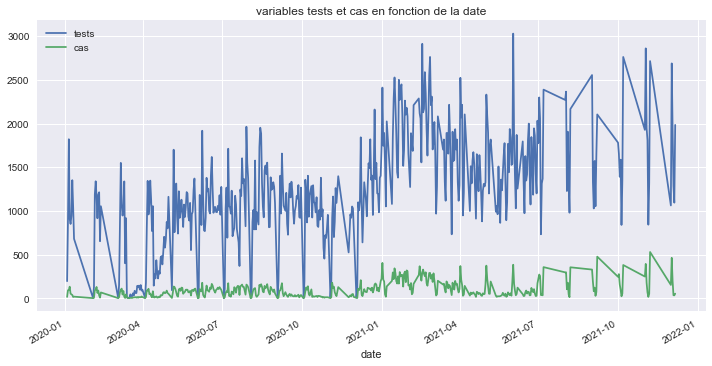

In [379]:
ax=data[['tests','cas',]].plot(figsize=(10,5))
plt.tight_layout()
plt.title('variables tests et cas en fonction de la date')
plt.show()

5. Représenter les variables communautaire et contact en fonction de la date dans le même graphique. Ajouter une légende dans le graphique.

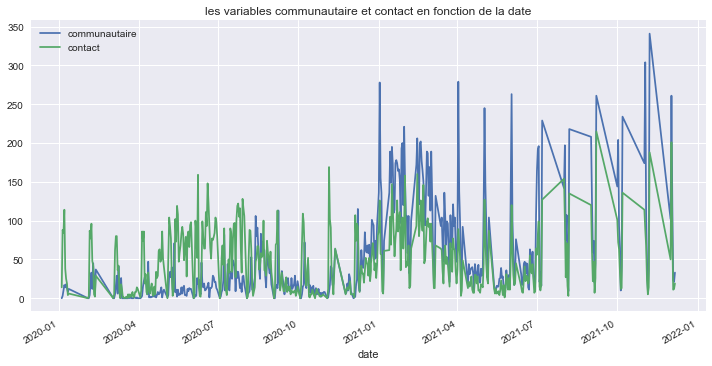

In [380]:
ay=data[['communautaire','contact']].plot(figsize=(10,5))
plt.tight_layout()
plt.title('les variables communautaire et contact en fonction de la date')
plt.show()

6. Tracer le Boxplot et l’histogramme de la variable cas. Conclure sur la présence ou non d’éven- tuelles valeurs manquantes pour cette variable.

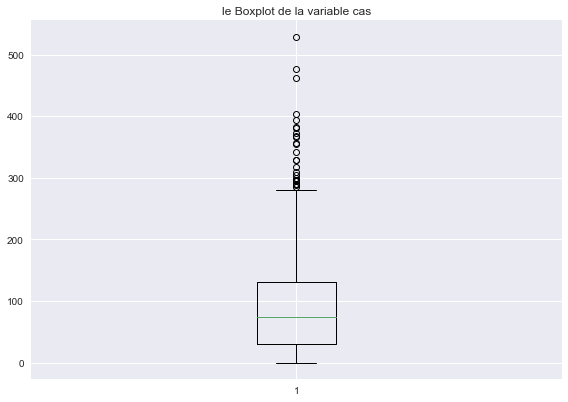

In [381]:
plt.figure()
x=plt.boxplot(data['cas'])
plt.tight_layout()
plt.figsize=(5,5)
plt.title('le Boxplot de la variable cas')
plt.show()

In [382]:
data.head()

,tests,cas,contact,importe,communautaire,proportion,total
date,,,,,,,
2020-02-03,1.0,1,0,0,0,100.0,1
2020-03-03,2.0,1,0,1,0,50.0,2
2020-04-03,2.0,2,1,1,0,100.0,4
2020-06-03,2.0,0,0,0,0,0.0,4
2020-07-03,2.0,0,0,0,0,0.0,4


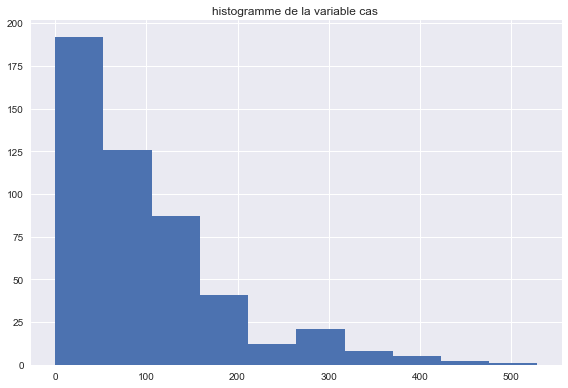

In [383]:
plt.figure()
plt.hist(data['cas'])
plt.title('histogramme de la variable cas ')
plt.tight_layout()
plt.show()

7. Discrétisez la variable cas. Pour ce faire on ajoutera une variable dans le DataFrame des données une nouvelle variable nommée cas_classe. Cette variable aura 4 classes :
[min(cas),Q1], ]Q1,Q2], ]Q2,Q3], ]Q3,max(cas)].
ou Q1, Q2, Q3 sont respectivement les 3 premiers quantiles de la variable cas, min(cas) et
max(cas) respectivement la plus petite et la plus grande valeur de la variable cas.

In [385]:
data['cas_classe']=data['cas'].min()
data.head()

,tests,cas,contact,importe,communautaire,proportion,total,cas_classe
date,,,,,,,,
2020-02-03,1.0,1,0,0,0,100.0,1,0
2020-03-03,2.0,1,0,1,0,50.0,2,0
2020-04-03,2.0,2,1,1,0,100.0,4,0
2020-06-03,2.0,0,0,0,0,0.0,4,0
2020-07-03,2.0,0,0,0,0,0.0,4,0


8. Donner les fréquences des modalités de la nouvelle variable cas_classe.


9. On suppose que la variables cas suit une loi binomiale négative N B(θ,p), θ > 0 et < 0 < p < 1. Calculer les estimations de θ et p en utilisant la méthode des moments.

10. Même question avec la méthode du maximum de vraisemblance
